In [1]:
from pydataset import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. What does the distribution of petal lengths look like?


In [178]:
#helps to know your data before
iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

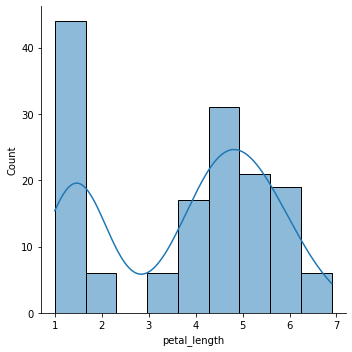

In [179]:
#distribution - displot
#kde

sns.displot(iris.petal_length, kde = True);

2. Is there a correlation between petal length and petal width?


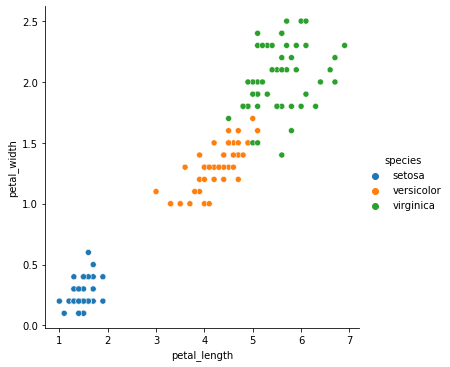

In [6]:
sns.relplot(data = iris, x= 'petal_length', y= 'petal_width', hue= 'species')

#yes

3. Would it be reasonable to predict species based on sepal width and sepal length?


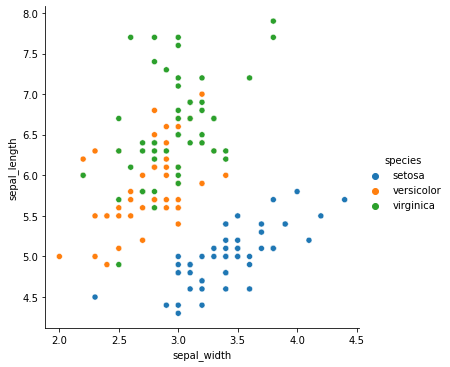

In [180]:
sns.relplot(data = iris, x = 'sepal_width', y='sepal_length', hue = 'species')

#Easy to predict the setosa using sepal width/length - virginica and veriscolor data correlates too close to use to predict species

#ravinder had the x & y opposite

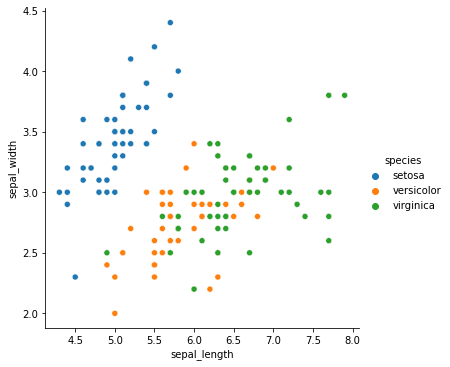

In [181]:
sns.relplot(data = iris, x = 'sepal_length', y='sepal_width', hue = 'species')


4. Which features would be best used to predict species?

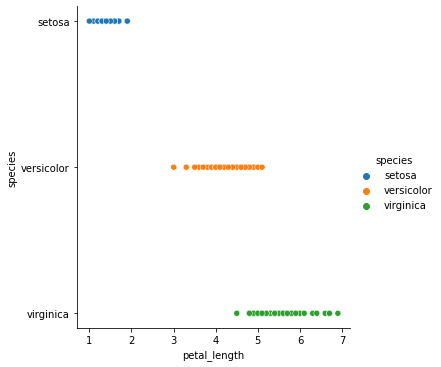

In [182]:
sns.relplot(data=iris, x='petal_length', y = 'species', hue='species')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

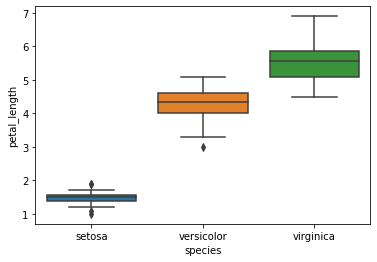

In [184]:
#ravinder's suggestion
sns.boxplot(y='petal_length', x='species', data=iris)

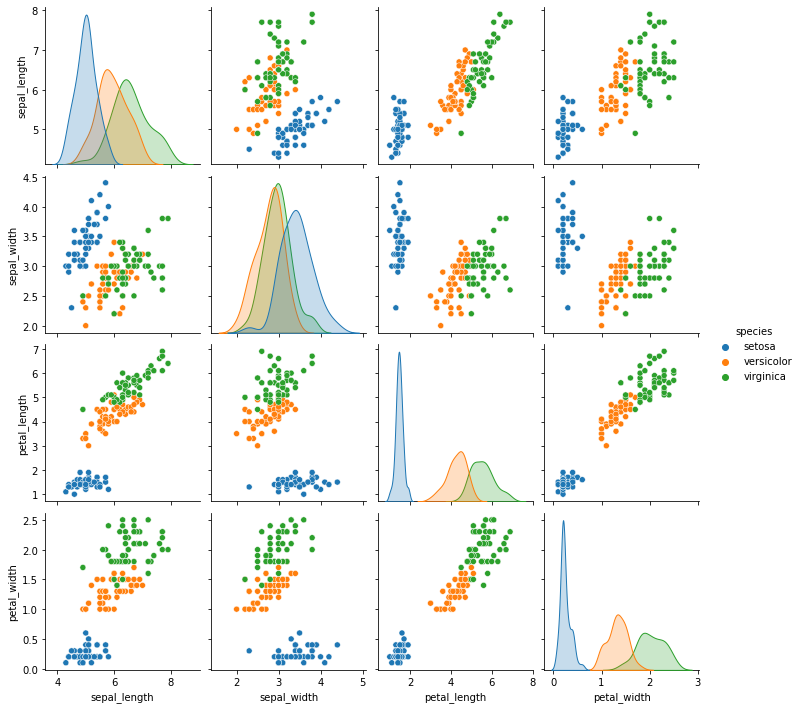

In [9]:
#fun way to look at data

sns.pairplot(data = iris, hue = 'species')

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [10]:
#anscombe data set - group data by dataset colum, calculate summary statistics

df = sns.load_dataset('anscombe')
df.info()

#col = dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [11]:
df.shape

(44, 3)

In [12]:
df.head(12)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [185]:
#use a groupby to further the describe property
df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [186]:
#longer code way - used describe
df.groupby('dataset').agg(['mean','median','std','count','min','max'])

x                                           y                   \
        mean median       std count  min   max      mean median       std   
dataset                                                                     
I        9.0    9.0  3.316625    11  4.0  14.0  7.500909   7.58  2.031568   
II       9.0    9.0  3.316625    11  4.0  14.0  7.500909   8.14  2.031657   
III      9.0    9.0  3.316625    11  4.0  14.0  7.500000   7.11  2.030424   
IV       9.0    8.0  3.316625    11  8.0  19.0  7.500909   7.04  2.030579   

                            
        count   min    max  
dataset                     
I          11  4.26  10.84  
II         11  3.10   9.26  
III        11  5.39  12.74  
IV         11  5.25  12.50

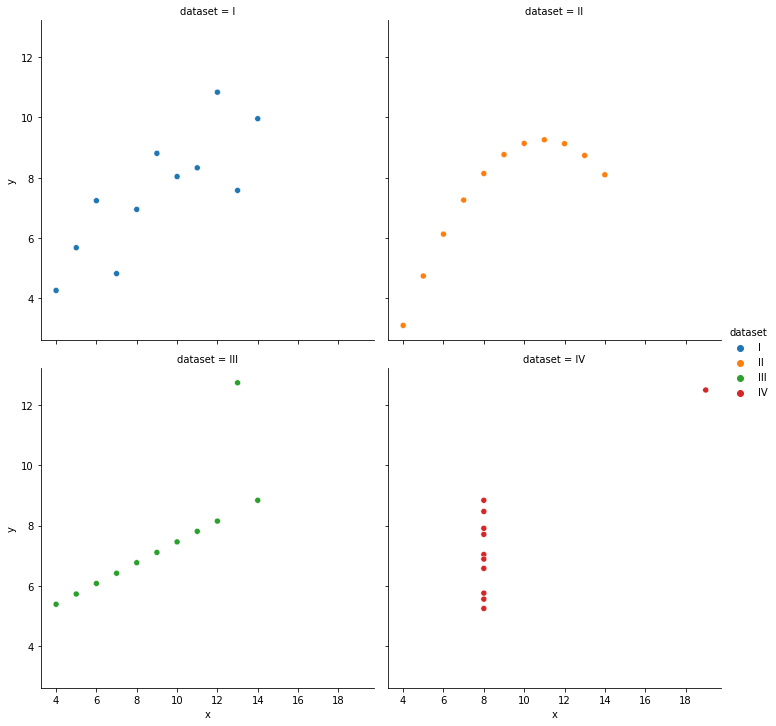

In [210]:
#column = dataset
sns.relplot(data = df, x='x', y='y', col='dataset', col_wrap =2,
           ci = None, hue = 'dataset')


In [16]:
### count, mean(x,y), std(x,y) is the same across all 4 plots 

2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [26]:
InsectSprays = data('InsectSprays')
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [193]:
insects.head(10)

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


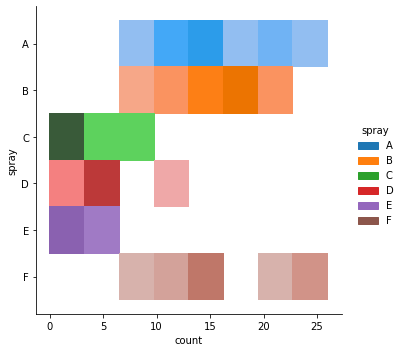

In [196]:
sns.displot(data=insects, x='count', y='spray', hue='spray')

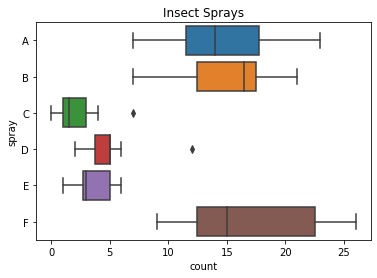

In [197]:
sns.boxplot(data=insects, x='count', y='spray')
plt.title('Insect Sprays')
plt.show()

3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

In [41]:
swiss = data('swiss')
data('swiss', show_doc=True)


swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [50]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [44]:
#new column set with variable over 50%
swiss['is_catholic'] = swiss['Catholic'] > 50

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

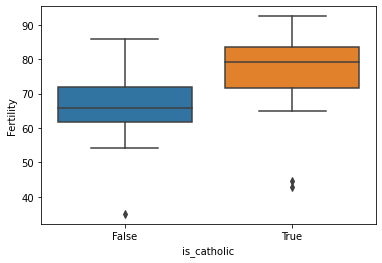

In [79]:
sns.boxplot(data=swiss, x= 'is_catholic', y='Fertility')

In [211]:

swiss.corr().Fertility


Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [ ]:
#copy from advance_dataframes exercise

In [86]:
def get_db_url(db_name):
    from env import user, host, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [88]:
sql = """
    SELECT * from orders
"""

In [90]:
url = get_db_url("chipotle")

chipo = pd.read_sql(sql, url)
chipo

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [91]:
raw_chipo = chipo

In [100]:
chipo.item_price = chipo.item_price.str.replace('$', '').astype(float)

<ipython-input-100-dc95c2effc25>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  chipo.item_price = chipo.item_price.str.replace('$', '').astype(float)


In [198]:
#bar chart of 4 most popular items & revenue


#4 most popular items
item_quants = chipo.groupby('item_name').agg(sum).sort_values('quantity', ascending = False).head(4)
item_quants

,id,order_id,quantity,item_price
item_name,,,,
Chicken Bowl,1780635,713926,761,7342.73
Chicken Burrito,1238770,497303,591,5575.82
Chips and Guacamole,1122252,449959,506,2201.04
Steak Burrito,818163,328437,386,3851.43


In [201]:
#Ravinders's:

best_sellers = chipo.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [203]:
chipo[chipo.item_name.isin(best_sellers.index)]

,id,order_id,quantity,item_name,choice_description,item_price
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",11.75
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25
10,11,5,1,Chips and Guacamole,nan,4.45
...,...,...,...,...,...,...
4607,4608,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, Sour Cream, Guacamole]]",11.75
4610,4611,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4616,4617,1832,1,Chips and Guacamole,nan,4.45
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75


Text(0.5, 0, 'Revenue of Top 4 Items')

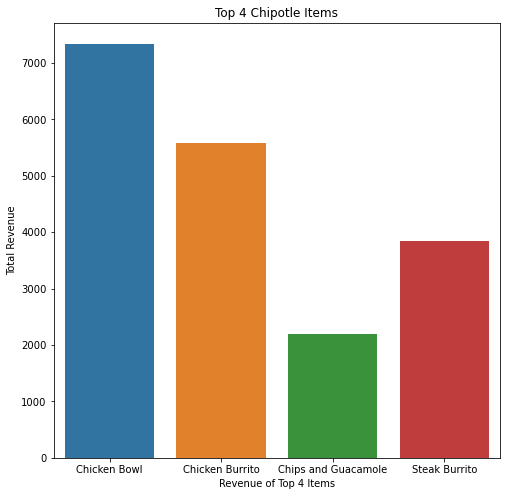

In [204]:
plt.figure(figsize = (8,8))
sns.barplot(data = item_quants, x=item_quants.index, y='item_price')
plt.title('Top 4 Chipotle Items')

plt.ylabel('Total Revenue')
plt.xlabel('Revenue of Top 4 Items')
#set x as dataframe.index

5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [ ]:
#sleepstudy

In [130]:
sleep = data('sleepstudy')
data('sleepstudy', show_doc=True)


sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [131]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [145]:
sleep.head(10)

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
6,414.6901,5,308
7,382.2038,6,308
8,290.1486,7,308
9,430.5853,8,308
10,466.3535,9,308


In [153]:
sleep['Subject'].nunique()

18

In [158]:
#asking for mean
sleep.Subject.value_counts()

308    10
309    10
371    10
370    10
369    10
352    10
351    10
350    10
349    10
337    10
335    10
334    10
333    10
332    10
331    10
330    10
310    10
372    10
Name: Subject, dtype: int64

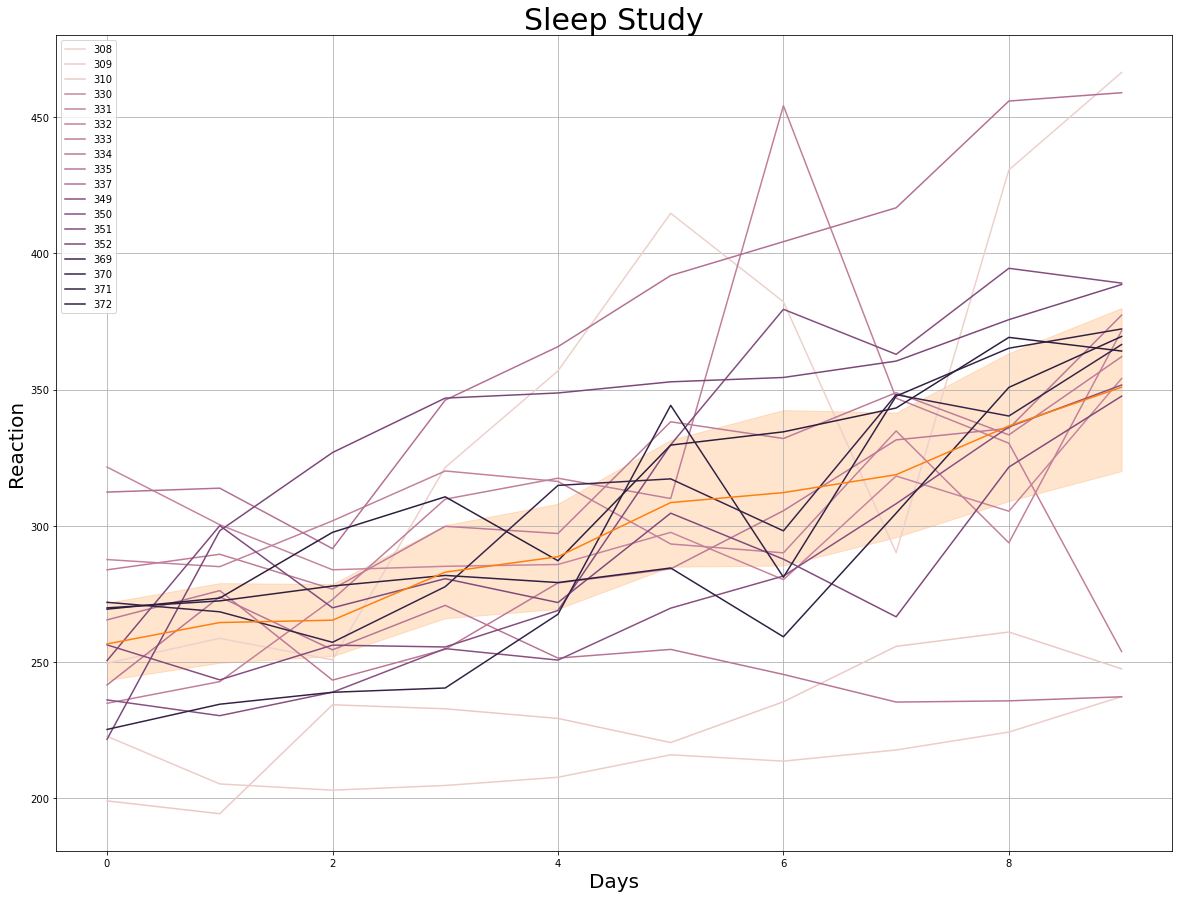

In [206]:
plt.figure(figsize=(20,15))

sns.lineplot(data = sleep, x='Days', y='Reaction', hue='Subject', legend= 'full')
sns.lineplot(data = sleep, x='Days', y='Reaction', estimator='mean')
plt.title('Sleep Study', fontsize=30)
plt.ylabel('Reaction', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.grid()
plt.show()
